In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import folium


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [5]:
from tqdm import tqdm_notebook

tqdm_notebook()

C:\Users\Jeong Yeseul\AppData\Local\Temp\ipykernel_14068\3247850626.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook()


0it [00:00, ?it/s]

In [6]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [7]:
main_df = pd.read_csv('../강남구전세데이터.csv')

In [8]:
main_df

,AD_Code,Admin_District,Area,YearBuilt,Type,Floor,Address,Cont_Date,Age,Latitude,Longitude,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y
0,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500
1,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-10-05,32,37.473722,127.052725,0,0,0,0,4.82,0,0,2,14333
2,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17115
3,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17640
4,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,2,대치동,66.64,2004,오피스텔,8.0,서울특별시 강남구 역삼로 432,2019-07-22,19,37.501439,127.054330,3,1,1,1,2.64,0,0,1,45000
87357,13,청담동,43.68,2005,오피스텔,5.0,서울특별시 강남구 압구정로 461,2019-06-21,18,37.525283,127.047239,3,17,0,2,2.74,0,0,1,38000
87358,13,청담동,31.57,2014,오피스텔,5.0,서울특별시 강남구 도산대로 406,2019-07-20,9,37.522821,127.039963,3,31,1,2,2.64,0,0,0,23500
87359,0,개포동,29.51,2020,오피스텔,6.0,서울특별시 강남구 논현로20길 12,2020-09-08,3,37.478097,127.045854,1,0,0,0,2.44,0,0,1,3000


In [9]:
df = pd.read_csv('아파트1112~2211원본.csv', encoding='cp949')

In [10]:
df

,시군구,도로명,전월세구분,계약년월,계약일,보증금(만원),단지명
0,서울특별시 강남구 개포동,언주로 103,전세,201201,20,"29,000",개포2차현대아파트(220)
1,서울특별시 강남구 개포동,언주로 103,전세,201202,7,"31,000",개포2차현대아파트(220)
2,서울특별시 강남구 개포동,언주로 103,전세,201202,18,"36,000",개포2차현대아파트(220)
3,서울특별시 강남구 개포동,언주로 103,전세,201207,8,"33,500",개포2차현대아파트(220)
4,서울특별시 강남구 개포동,언주로 103,전세,201207,12,"30,000",개포2차현대아파트(220)
...,...,...,...,...,...,...,...
183763,서울특별시 강남구 청담동,도산대로 454,월세,202206,2,330,휴먼스타빌
183764,서울특별시 강남구 청담동,도산대로 454,전세,202208,11,"45,000",휴먼스타빌
183765,서울특별시 강남구 청담동,도산대로 454,월세,202208,22,300,휴먼스타빌
183766,서울특별시 강남구 청담동,도산대로 454,월세,202209,14,330,휴먼스타빌


In [11]:
idx = df[df['전월세구분'].str.contains('월세')].index
df = df.drop(idx)

In [12]:
df

,시군구,도로명,전월세구분,계약년월,계약일,보증금(만원),단지명
0,서울특별시 강남구 개포동,언주로 103,전세,201201,20,"29,000",개포2차현대아파트(220)
1,서울특별시 강남구 개포동,언주로 103,전세,201202,7,"31,000",개포2차현대아파트(220)
2,서울특별시 강남구 개포동,언주로 103,전세,201202,18,"36,000",개포2차현대아파트(220)
3,서울특별시 강남구 개포동,언주로 103,전세,201207,8,"33,500",개포2차현대아파트(220)
4,서울특별시 강남구 개포동,언주로 103,전세,201207,12,"30,000",개포2차현대아파트(220)
...,...,...,...,...,...,...,...
183752,서울특별시 강남구 청담동,도산대로 454,전세,202201,5,"38,850",휴먼스타빌
183753,서울특별시 강남구 청담동,도산대로 454,전세,202201,18,"37,800",휴먼스타빌
183759,서울특별시 강남구 청담동,도산대로 454,전세,202204,5,"45,000",휴먼스타빌
183760,서울특별시 강남구 청담동,도산대로 454,전세,202204,7,"38,850",휴먼스타빌


In [13]:
df1 = df['시군구'].str.split(" ",expand=True)

In [14]:
df1

,0,1,2
0,서울특별시,강남구,개포동
1,서울특별시,강남구,개포동
2,서울특별시,강남구,개포동
3,서울특별시,강남구,개포동
4,서울특별시,강남구,개포동
...,...,...,...
183752,서울특별시,강남구,청담동
183753,서울특별시,강남구,청담동
183759,서울특별시,강남구,청담동
183760,서울특별시,강남구,청담동


In [15]:
df1["시구"] = df1[0] + " " + df1[1]

In [16]:
df1

,0,1,2,시구
0,서울특별시,강남구,개포동,서울특별시 강남구
1,서울특별시,강남구,개포동,서울특별시 강남구
2,서울특별시,강남구,개포동,서울특별시 강남구
3,서울특별시,강남구,개포동,서울특별시 강남구
4,서울특별시,강남구,개포동,서울특별시 강남구
...,...,...,...,...
183752,서울특별시,강남구,청담동,서울특별시 강남구
183753,서울특별시,강남구,청담동,서울특별시 강남구
183759,서울특별시,강남구,청담동,서울특별시 강남구
183760,서울특별시,강남구,청담동,서울특별시 강남구


In [17]:
df["도로명주소"] = df1["시구"] + " " + df["도로명"]

In [18]:
df

,시군구,도로명,전월세구분,계약년월,계약일,보증금(만원),단지명,도로명주소
0,서울특별시 강남구 개포동,언주로 103,전세,201201,20,"29,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103
1,서울특별시 강남구 개포동,언주로 103,전세,201202,7,"31,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103
2,서울특별시 강남구 개포동,언주로 103,전세,201202,18,"36,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103
3,서울특별시 강남구 개포동,언주로 103,전세,201207,8,"33,500",개포2차현대아파트(220),서울특별시 강남구 언주로 103
4,서울특별시 강남구 개포동,언주로 103,전세,201207,12,"30,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103
...,...,...,...,...,...,...,...,...
183752,서울특별시 강남구 청담동,도산대로 454,전세,202201,5,"38,850",휴먼스타빌,서울특별시 강남구 도산대로 454
183753,서울특별시 강남구 청담동,도산대로 454,전세,202201,18,"37,800",휴먼스타빌,서울특별시 강남구 도산대로 454
183759,서울특별시 강남구 청담동,도산대로 454,전세,202204,5,"45,000",휴먼스타빌,서울특별시 강남구 도산대로 454
183760,서울특별시 강남구 청담동,도산대로 454,전세,202204,7,"38,850",휴먼스타빌,서울특별시 강남구 도산대로 454


In [19]:
df["동"] = df1[2]

In [20]:
df

,시군구,도로명,전월세구분,계약년월,계약일,보증금(만원),단지명,도로명주소,동
0,서울특별시 강남구 개포동,언주로 103,전세,201201,20,"29,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
1,서울특별시 강남구 개포동,언주로 103,전세,201202,7,"31,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
2,서울특별시 강남구 개포동,언주로 103,전세,201202,18,"36,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
3,서울특별시 강남구 개포동,언주로 103,전세,201207,8,"33,500",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
4,서울특별시 강남구 개포동,언주로 103,전세,201207,12,"30,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
...,...,...,...,...,...,...,...,...,...
183752,서울특별시 강남구 청담동,도산대로 454,전세,202201,5,"38,850",휴먼스타빌,서울특별시 강남구 도산대로 454,청담동
183753,서울특별시 강남구 청담동,도산대로 454,전세,202201,18,"37,800",휴먼스타빌,서울특별시 강남구 도산대로 454,청담동
183759,서울특별시 강남구 청담동,도산대로 454,전세,202204,5,"45,000",휴먼스타빌,서울특별시 강남구 도산대로 454,청담동
183760,서울특별시 강남구 청담동,도산대로 454,전세,202204,7,"38,850",휴먼스타빌,서울특별시 강남구 도산대로 454,청담동


In [21]:
df = df.drop('시군구', axis=1)

In [22]:
df = df.drop('도로명', axis=1)

In [23]:
df = df.drop('전월세구분', axis=1) 

In [24]:
############# 도로명주소 정리
############# '동'만 따로 열 생성

In [25]:
df 

,계약년월,계약일,보증금(만원),단지명,도로명주소,동
0,201201,20,"29,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
1,201202,7,"31,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
2,201202,18,"36,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
3,201207,8,"33,500",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
4,201207,12,"30,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
...,...,...,...,...,...,...
183752,202201,5,"38,850",휴먼스타빌,서울특별시 강남구 도산대로 454,청담동
183753,202201,18,"37,800",휴먼스타빌,서울특별시 강남구 도산대로 454,청담동
183759,202204,5,"45,000",휴먼스타빌,서울특별시 강남구 도산대로 454,청담동
183760,202204,7,"38,850",휴먼스타빌,서울특별시 강남구 도산대로 454,청담동


In [26]:
######## 계약년월일 합치기 start!

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117410 entries, 0 to 183764
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   계약년월     117410 non-null  int64 
 1   계약일      117410 non-null  int64 
 2   보증금(만원)  117410 non-null  object
 3   단지명      117410 non-null  object
 4   도로명주소    117410 non-null  object
 5   동        117410 non-null  object
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [28]:
df['계약년월'] = df['계약년월'].astype(str) #int라서 안 합쳐짐. 그래서 object타입으로 일단 변경

In [29]:
df['계약일'] = df['계약일'].astype(str) #int라서 안 합쳐짐. 그래서 object타입으로 일단 변경

In [30]:
df['계약일'] = df['계약일'].str.zfill(2) #일이 한자리수도 있어서, 두자리 형태로 채워주기

In [31]:
df

,계약년월,계약일,보증금(만원),단지명,도로명주소,동
0,201201,20,"29,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
1,201202,07,"31,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
2,201202,18,"36,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
3,201207,08,"33,500",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
4,201207,12,"30,000",개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동
...,...,...,...,...,...,...
183752,202201,05,"38,850",휴먼스타빌,서울특별시 강남구 도산대로 454,청담동
183753,202201,18,"37,800",휴먼스타빌,서울특별시 강남구 도산대로 454,청담동
183759,202204,05,"45,000",휴먼스타빌,서울특별시 강남구 도산대로 454,청담동
183760,202204,07,"38,850",휴먼스타빌,서울특별시 강남구 도산대로 454,청담동


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117410 entries, 0 to 183764
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   계약년월     117410 non-null  object
 1   계약일      117410 non-null  object
 2   보증금(만원)  117410 non-null  object
 3   단지명      117410 non-null  object
 4   도로명주소    117410 non-null  object
 5   동        117410 non-null  object
dtypes: object(6)
memory usage: 6.3+ MB


In [33]:
df["계약날짜"] = df["계약년월"] + "" + df["계약일"] #합치기

In [34]:
df.info() #합치기 완료 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117410 entries, 0 to 183764
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   계약년월     117410 non-null  object
 1   계약일      117410 non-null  object
 2   보증금(만원)  117410 non-null  object
 3   단지명      117410 non-null  object
 4   도로명주소    117410 non-null  object
 5   동        117410 non-null  object
 6   계약날짜     117410 non-null  object
dtypes: object(7)
memory usage: 7.2+ MB


In [35]:
df['계약날짜'] = pd.to_datetime(df['계약날짜'])

In [36]:
df['계약날짜'] = pd.to_datetime(df['계약날짜'])

In [37]:
df.info() #날짜데이터타입으로 변경

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117410 entries, 0 to 183764
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   계약년월     117410 non-null  object        
 1   계약일      117410 non-null  object        
 2   보증금(만원)  117410 non-null  object        
 3   단지명      117410 non-null  object        
 4   도로명주소    117410 non-null  object        
 5   동        117410 non-null  object        
 6   계약날짜     117410 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 7.2+ MB


In [38]:
df = df.drop('계약일', axis=1) #계약일은 필요없을듯

In [39]:
df['보증금(만원)'] = df['보증금(만원)'].str.replace(',', '') #보증금 int로 변경 시작! 일단 , 빼기

In [40]:
df['보증금(만원)'] = df['보증금(만원)'].astype(int)

In [41]:
df.info() # 보증금은 int, 계약날짜는 datetime 완료.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117410 entries, 0 to 183764
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   계약년월     117410 non-null  object        
 1   보증금(만원)  117410 non-null  int32         
 2   단지명      117410 non-null  object        
 3   도로명주소    117410 non-null  object        
 4   동        117410 non-null  object        
 5   계약날짜     117410 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 5.8+ MB


In [42]:
#df.to_csv('11년12월~22년11월.csv',encoding='cp949')

In [43]:
month = df.groupby("계약년월").count()
month

,보증금(만원),단지명,도로명주소,동,계약날짜
계약년월,,,,,
201112,1128,1128,1128,1128,1128
201201,1124,1124,1124,1124,1124
201202,1311,1311,1311,1311,1311
201203,1008,1008,1008,1008,1008
201204,840,840,840,840,840
201205,869,869,869,869,869
201206,932,932,932,932,932
201207,750,750,750,750,750
201208,834,834,834,834,834


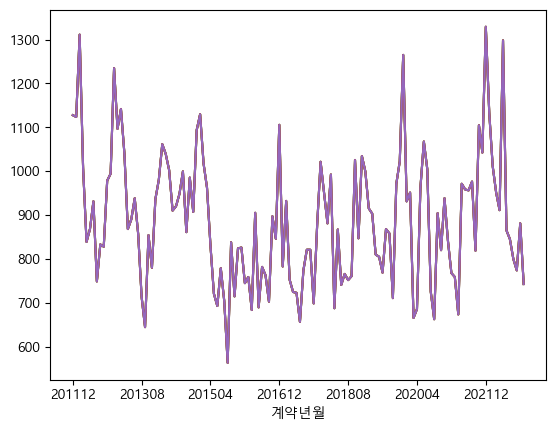

In [44]:
df.groupby(['계약년월']).count().plot().get_legend().remove() 

In [45]:
df['계약연도'] = df['계약년월'].str[:4]
df

,계약년월,보증금(만원),단지명,도로명주소,동,계약날짜,계약연도
0,201201,29000,개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동,2012-01-20,2012
1,201202,31000,개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동,2012-02-07,2012
2,201202,36000,개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동,2012-02-18,2012
3,201207,33500,개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동,2012-07-08,2012
4,201207,30000,개포2차현대아파트(220),서울특별시 강남구 언주로 103,개포동,2012-07-12,2012
...,...,...,...,...,...,...,...
183752,202201,38850,휴먼스타빌,서울특별시 강남구 도산대로 454,청담동,2022-01-05,2022
183753,202201,37800,휴먼스타빌,서울특별시 강남구 도산대로 454,청담동,2022-01-18,2022
183759,202204,45000,휴먼스타빌,서울특별시 강남구 도산대로 454,청담동,2022-04-05,2022
183760,202204,38850,휴먼스타빌,서울특별시 강남구 도산대로 454,청담동,2022-04-07,2022


In [47]:
df.groupby(['계약연도']).count()

,계약년월,보증금(만원),단지명,도로명주소,동,계약날짜
계약연도,,,,,,
2011,1128,1128,1128,1128,1128,1128
2012,11706,11706,11706,11706,11706,11706
2013,10771,10771,10771,10771,10771,10771
2014,11717,11717,11717,11717,11717,11717
2015,9790,9790,9790,9790,9790,9790
2016,9717,9717,9717,9717,9717,9717
2017,9598,9598,9598,9598,9598,9598
2018,10317,10317,10317,10317,10317,10317
2019,10907,10907,10907,10907,10907,10907


In [88]:
#df_2017 = df[(df['계약날짜'] >= '2017-01-01') & (df['계약날짜'] <= '2017-12-31')] 
#df_2017

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, '보증금 그래프')

Text(0.5, 0, '날짜')

Text(0, 0.5, '값')

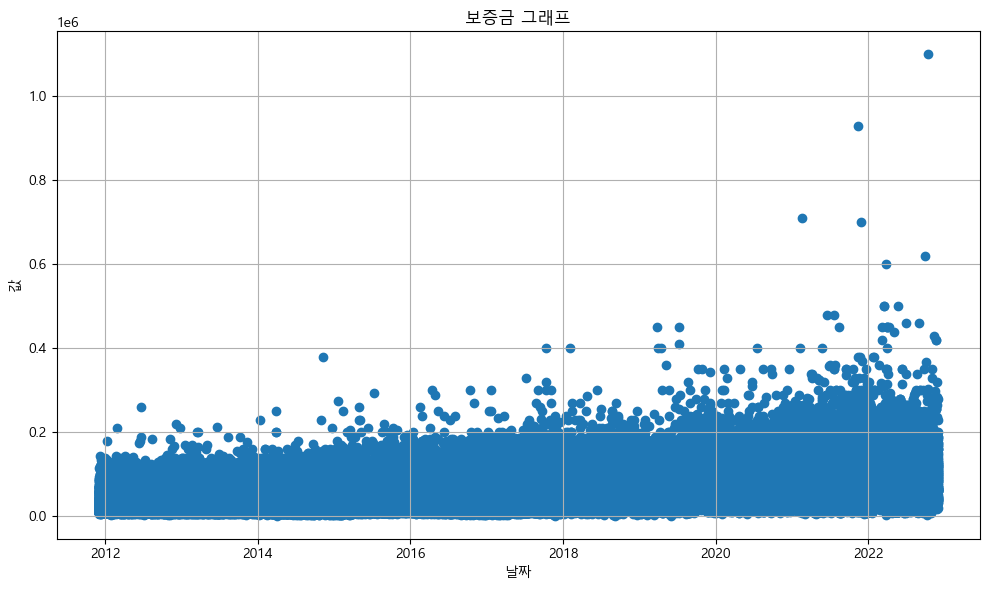

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(df['계약날짜'], df['보증금(만원)'], marker='o')
plt.title('보증금 그래프')
plt.xlabel('날짜')
plt.ylabel('값')
plt.grid(True)
plt.tight_layout()

plt.show()

In [89]:
#코드 테스트
#df_20112014 = df[(df['계약날짜'] >= '2011-12-01') & (df['계약날짜'] <= '2014-12-31')] 
#df_20112014

In [90]:
#df_20112014.groupby(['계약년월']).count() #11년도12월~14년도12월까지 데이터

In [91]:
#df_20112014.groupby(['계약년월']).count().plot(color='blue').get_legend().remove()

In [75]:
#좀더 촘촘하게 보기
df_201213 = df[(df['계약날짜'] >= '2011-12-01') & (df['계약날짜'] <= '2013-12-31')] 
df_201415 = df[(df['계약날짜'] >= '2014-01-01') & (df['계약날짜'] <= '2015-12-31')] 
df_201617 = df[(df['계약날짜'] >= '2016-01-01') & (df['계약날짜'] <= '2017-12-31')] 
df_201819 = df[(df['계약날짜'] >= '2018-01-01') & (df['계약날짜'] <= '2019-12-31')] 
df_202021 = df[(df['계약날짜'] >= '2020-01-01') & (df['계약날짜'] <= '2021-12-31')] 
df_2022 = df[(df['계약날짜'] >= '2022-01-01') & (df['계약날짜'] <= '2022-12-31')] 

(0.0, 1400.0)

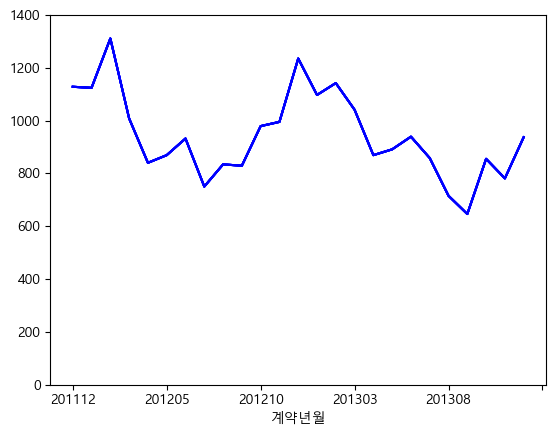

In [97]:
df_201213.groupby(['계약년월']).count().plot(color='blue').get_legend().remove()
plt.ylim(0, 1400)

(0.0, 1400.0)

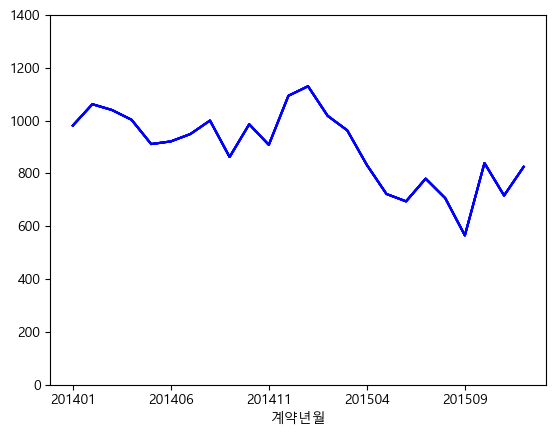

In [98]:
df_201415.groupby(['계약년월']).count().plot(color='blue').get_legend().remove()
plt.ylim(0, 1400)

(0.0, 1400.0)

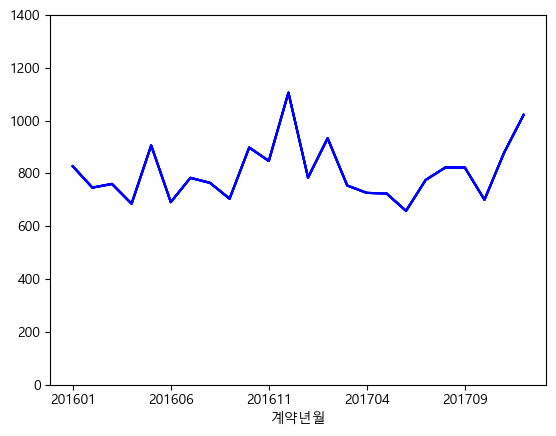

In [99]:
df_201617.groupby(['계약년월']).count().plot(color='blue').get_legend().remove()
plt.ylim(0, 1400)

(0.0, 1400.0)

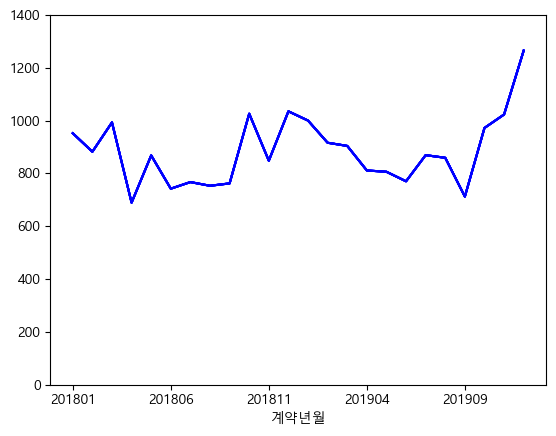

In [100]:
df_201819.groupby(['계약년월']).count().plot(color='blue').get_legend().remove()
plt.ylim(0, 1400)

(0.0, 1400.0)

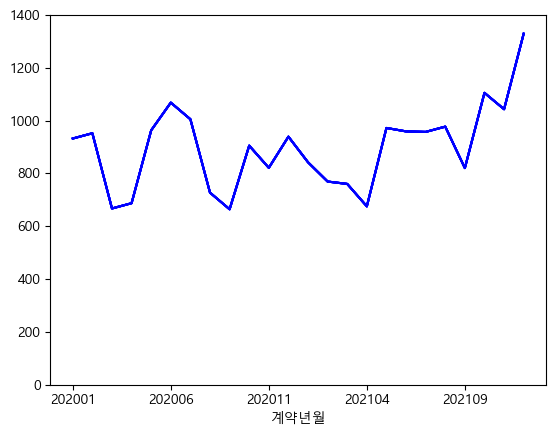

In [101]:
df_202021.groupby(['계약년월']).count().plot(color='blue').get_legend().remove()
plt.ylim(0, 1400)